# Machine Learning with sci-kit

# Agenda

* Machine Learning pipeline review
* scikit Python Library
* Data representation
  * Feature Matrix
  * Target array
  * iris dataset example
* Estimator API
* Linear Regression
  * Simple Linear Regression
  * Model Evaluation
  * Polynomial Regression
* Selecting the Best Model
* The bias-variance trade-off
* Summary

# Libraries Import

First we need to import required libraries. More to the libraries later.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import preprocessing
sns.set()

# Machine Learning Pipeline


<img src="CRISP-DM_Process_Diagram.png" alt="Drawing" style="width: 400px;"/>


Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation and Deployment.

**Business Understanding** consists of the translation of the business objectives and
requirements into a data mining approach. **Data Understanding**  ranges from data
collection to the examination of the data quality, this step is very much linked to the
Business Understanding because it is important to have a clear understanding of the
data to translate the business objectives and requirements. In the phase of the **Data
Preparation** it is required to process the data for the model. This phase has multiple
iterations. The **modeling** consists of the application of various techniques to make sure
that the best one can be picked out of a comprehensive number of options. **Deployment**
is the last step and makes sure that the appropriate model is being implemented into
the system and that the user is able to conduct the analysis on his own.

# scikit-learn Python Library

There are several Python libraries which provide machine learning algorithms implementation but [scikit-learn](http://scikit-learn.org) is the most popular one.

Some advantages of this library:
* provides efficient implementations of a large number of common algorithms
* clean and uniform API which allows you to easily swap algorithms since they have the same interface
* very good documentation and samples/tutorials
* built on numpy/scipy/matplotlib
* open source, commercially usable!

![](https://i1.wp.com/blog.kaggle.com/wp-content/uploads/2015/04/drop_shadows_background2.png)

## Data representation

scikit-learn takes as input tables of data (`numpy.ndarray`).

A basic table is a two-dimensional grid of data, where each row represents individual samples (elements) of the dataset, and the columns represent the features of the samples.

The number of rows is equivalent to the number of samples (`n_samples`), while the number of columns represents the number of features (`n_features`).

**Feature Matrix**

The matrix that contains the features of the samples is called *features matrix*.
By convention, this matrix is often reffered to as a variable named `X`, is two-dimensional, with shape `(n_samples, n_features)`.
The type of `X` is usually a `numpy.ndarray` or a Pandas `DataFrame`.

The samples (rows) always refer to the individual objects described by the dataset. For example, a sample might be a person, document, a video, anything that you can describe with a set of values.

The features (columns) always refer to observations that describe each sample. Features are generally real-valued, by may be boolean, or discrete valued (either numerical or even strings).


**Target array**

When working with Supervised Learning, besides our feature matrix ``X``, we have a *label*/*target* array, which by convention we will call `y`.
This array is usually one dimensional, length ``n_samples``.
The type of `y` is either a `numpy.ndarray` or Pandas ``Series``.

There are estimators that can handle multiple target values in the form of a two-dimensional ``[n_samples, n_targets]`` target array.

Remember, the target array is the quantity we want to eventually predict with our model.

### Summary

The expected layout for both `X` and `y` is the following:

![](figures/scikit-learn-feature-target-array.png)

# Data Understanding

Before we can jump into modelling, it is always necessary to understand the data. 

In [122]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

Let's look at the first five rows and the data types of the data to get a better understanding. Use the `dtypes` module to print the data types and the `head()` module to show the first 5 rows.

In [142]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [131]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


It is always recommended to check for missing values.

If one column / feature has missing values, you have two options: deleting or filling in the values. 

If a feature has just a few missing values, it might be fine to simply delete the rows from the data. 

However, if the number is quite high, it is recommended to fill in the missing values (or in specific cases even not take the given feature into account)

Filling in the missing values is called Imputation. There are a variety of methods to fill in the gaps, such as taking the median or mean for a given numeric feature.

![](1*_RA3mCS30Pr0vUxbp25Yxw.png)

`isnull()` checks the columns for missing values. With `sum()` we can sum those missing values up. Combine those two modules.  

In [22]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

It seems we do not have any missing values. 

Another good practice is to use the describe function on the numeric values of the dataset. 

It computes counts, means, standard deviations, minimum, maximum and quantiles.

This method is good, because it gives you an overview of the value ranges, which show if some features have unusal outliers. 

It also shows if some features have a dummy variable (f.e. -99 or -999), which sometimes are used for missing values.

Apply the `describe()` module. 

In [24]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


You can also plot boxplots to investigate further.

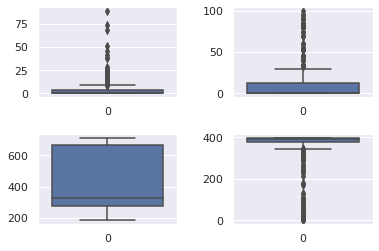

In [49]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data = boston['CRIM'], ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data = boston['ZN'], ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data = boston['TAX'], ax=ax)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data = boston['B'], ax=ax)
plt.show()

**Normalization**

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method were using to normalize here is called the Box-Cox Transformation. 

**Scaling**

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

By scaling your variables, you can help compare different variables on equal footing. To help solidify what scaling looks like, let's look at a made-up example. (Don't worry, we'll work with real data in just a second, this is just to help illustrate my point.)

In [133]:
normalized_boston = pd.DataFrame(preprocessing.normalize(boston), columns= boston.columns)

Let's have a look again after the normalization. Apply `head()` to the new dataset.  

In [134]:
normalized_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000013,0.035997,0.004620,0.0,0.001076,0.013149,0.130388,0.008179,0.002000,0.591945,0.030597,0.793727,0.009959
1,0.000058,0.000000,0.014977,0.0,0.000994,0.013602,0.167140,0.010522,0.004237,0.512648,0.037707,0.840785,0.019362
2,0.000059,0.000000,0.015174,0.0,0.001007,0.015421,0.131140,0.010661,0.004293,0.519409,0.038204,0.843138,0.008650
3,0.000071,0.000000,0.004785,0.0,0.001005,0.015360,0.100527,0.013306,0.006585,0.487268,0.041045,0.866174,0.006453
4,0.000151,0.000000,0.004755,0.0,0.000999,0.015587,0.118209,0.013222,0.006543,0.484177,0.040784,0.865631,0.011625


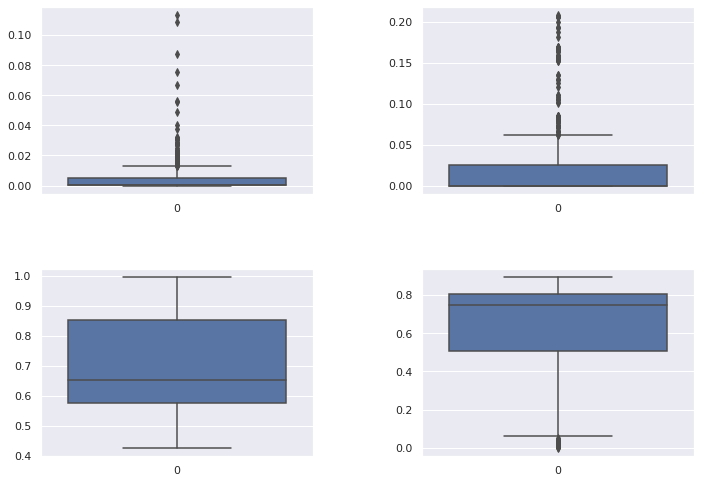

In [135]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data = normalized_boston['CRIM'], ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data = normalized_boston['ZN'], ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data = normalized_boston['TAX'], ax=ax)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data = normalized_boston['B'], ax=ax)
plt.show()

Let's standardize the data (here called scaling).

In [137]:
scaled_boston = pd.DataFrame(preprocessing.scale(boston), columns= boston.columns)

Have a look at the data.

In [138]:
scaled_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


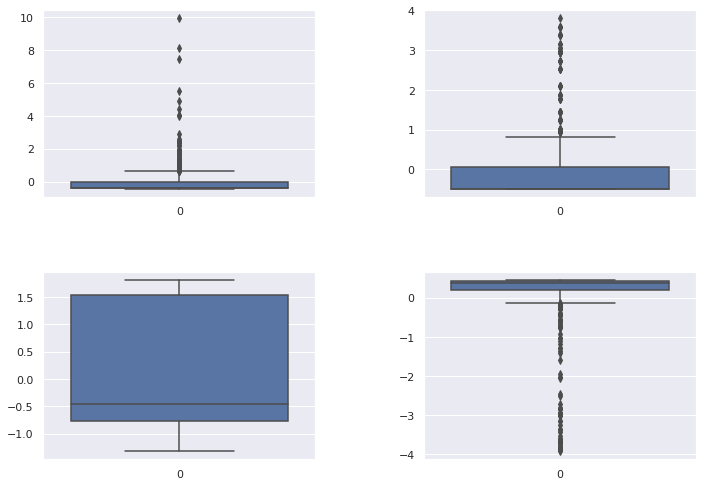

In [139]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data = scaled_boston['CRIM'], ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data = scaled_boston['ZN'], ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data = scaled_boston['TAX'], ax=ax)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data = scaled_boston['B'], ax=ax)
plt.show()

You might have noticed that we only worked with the features. We also need to add the target variable.

In [ ]:
boston['MEDV'] = boston_dataset.target

Apply the same logic to our scaled features. 

In [158]:
scaled_boston['MEDV'] = boston_dataset.target
normalized_boston['MEDV'] = boston_dataset.target

Let's have a look at the distribution. 

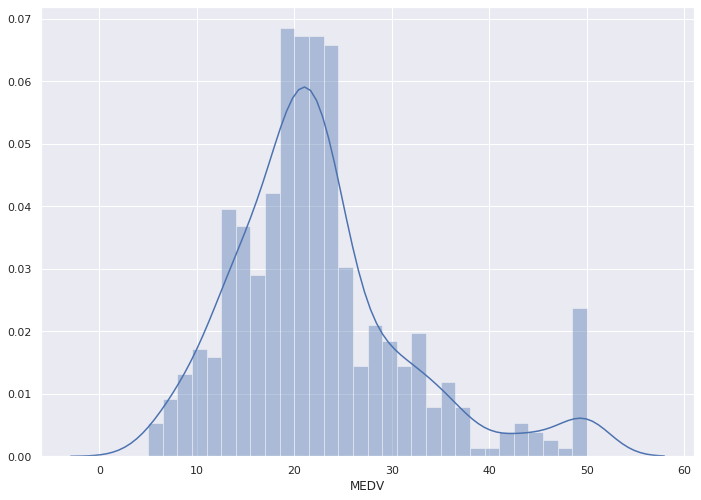

In [143]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

One way to already look into relevant features which might have an influence on the target is the correlation matrix. 

The correlation matrix gives you the corrlation coefficients between two features. 

The coefficient ranges from -1 to 1. See a rule of thumb below.

![](guideline-for-interpreting-correlation-coefficient-2-638.jpg)

**Causation vs. Correlation**

Even though those correlation coefficients might be an indicator for the target variable, but it can also just be a correlation effect without any causation.

Again, correlation describes a situation where two values increase in the same or opposite direction (simultaneously). But this does not mean the one is the cause for the increase / decrease of the other.  

![](correlation-vs-causation-phone-RAM1-1024x574.png)

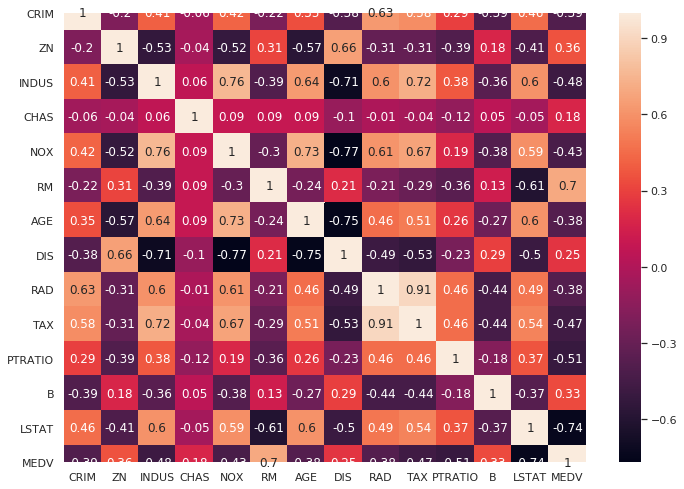

In [144]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

We can see that LSTAT and MEDV are strongly negative correlated and RM strongly positive correlated. Let's have a closer look. 

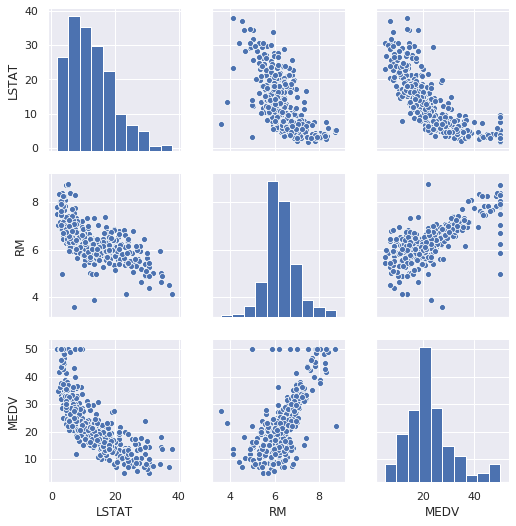

In [152]:
new_boston = boston[['LSTAT', 'RM', 'MEDV']]
sns.pairplot(new_boston)

The scatter plots confirm the correlations. The pairplot module gives us scatter plots for two different features and the distribution plot for itself. 

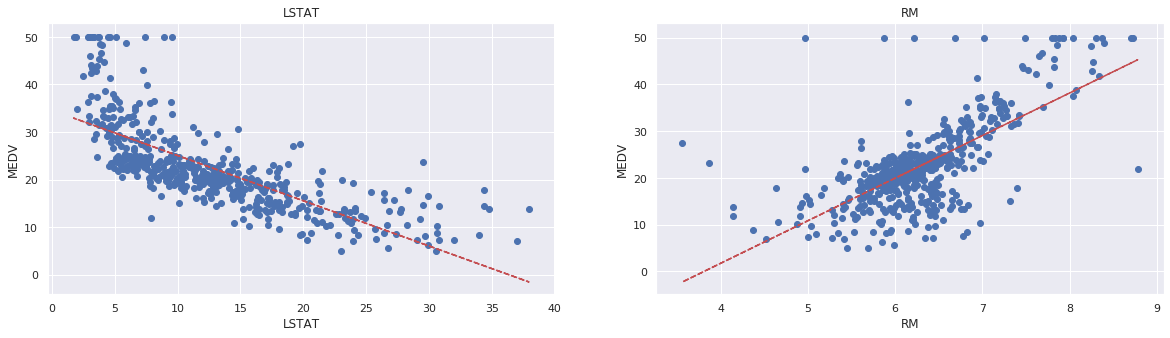

In [153]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Let's move on in our Machine Learning Pipeline. For now let's only use LSTAT and RM as a feature and see what happens. 

In [146]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

We need to split the data into training and testing sets. 

![](grid_search_cross_validation.png)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

NameError: name 'X' is not defined

First, we need to define the model. In our case a linear regression model. Afterwards, the model has to be fitted or also called trained. Try this on your own. Use the `fit()` module and pass the `X_train` and `Y_train` arguments along. 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()

NameError: name 'X_train' is not defined

In [7]:
print("Unhide me")
lin_model.fit(X_train, Y_train)

Unhide me


Once the model is trained, we can make predictions. We will do this on the training set and the testing set to have a comparison. Use `lin_model` with `predict()` and `X_train` as well as `X_test`. 

`y_train_predict =`  
`y_test_predict =`

In [ ]:
y_train_predict = lin_model.predict(X_train)
y_test_predict = lin_model.predict(X_test)

Now let's have a look at two different metrics to evaluate the performance.

We calcualte the Root Mean Square Error and the R Squared Score.

The Root Mean Square Error (RMSE) bascally describes how good the model "fits" into (predicts) the real values (on average). 

![](regression3a-1.png)

This picture shows a linear regression model. The RMSE is calculated based on the distance from the model to the real values as demonstrated in the picture above. 

The (R-squared) , (also called the coefficient of determination), which is the proportion of variance (%) in the dependent variable that can be explained by the independent variable. Hence, as a rule of thumb for interpreting the strength of a relationship based on its R-squared value (use the absolute value of the R-squared value to make all values positive):

- if  R-squared value < 0.3 this value is generally considered a None or Very weak effect size,
- if R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size,
- if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size,
- if R-squared value r > 0.7 this value is generally considered strong effect size,

The R-square is usually between 0 and 1. However, RMSE does not have a certain interval. 

RMSE is harder to interpret, because it is a relative measure. The general rule is to keep it as small as possible. A good practice is to compare RMSE values of different models, splits etc.

In [149]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


Score in the testing set is better.

This concludes our first exercise. 

# Normalized

In [159]:
X = pd.DataFrame(np.c_[normalized_boston['LSTAT'], normalized_boston['RM']], columns = ['LSTAT','RM'])
Y = normalized_boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

(404, 2)
(102, 2)
(404,)
(102,)
The model performance for training set
--------------------------------------
RMSE is 5.7068240629336575
R2 score is 0.6208708115448042


The model performance for testing set
--------------------------------------
RMSE is 4.945953398990404
R2 score is 0.6875559296046472


Score with the testing is better. 

# Scaled

In [160]:
X = pd.DataFrame(np.c_[scaled_boston['LSTAT'], scaled_boston['RM']], columns = ['LSTAT','RM'])
Y = scaled_boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

(404, 2)
(102, 2)
(404,)
(102,)
The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702912
R2 score is 0.6628996975186952


The score on the testing set is better that on the training set which is desired, because we do not overfit.

### ~~iris dataset example~~

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


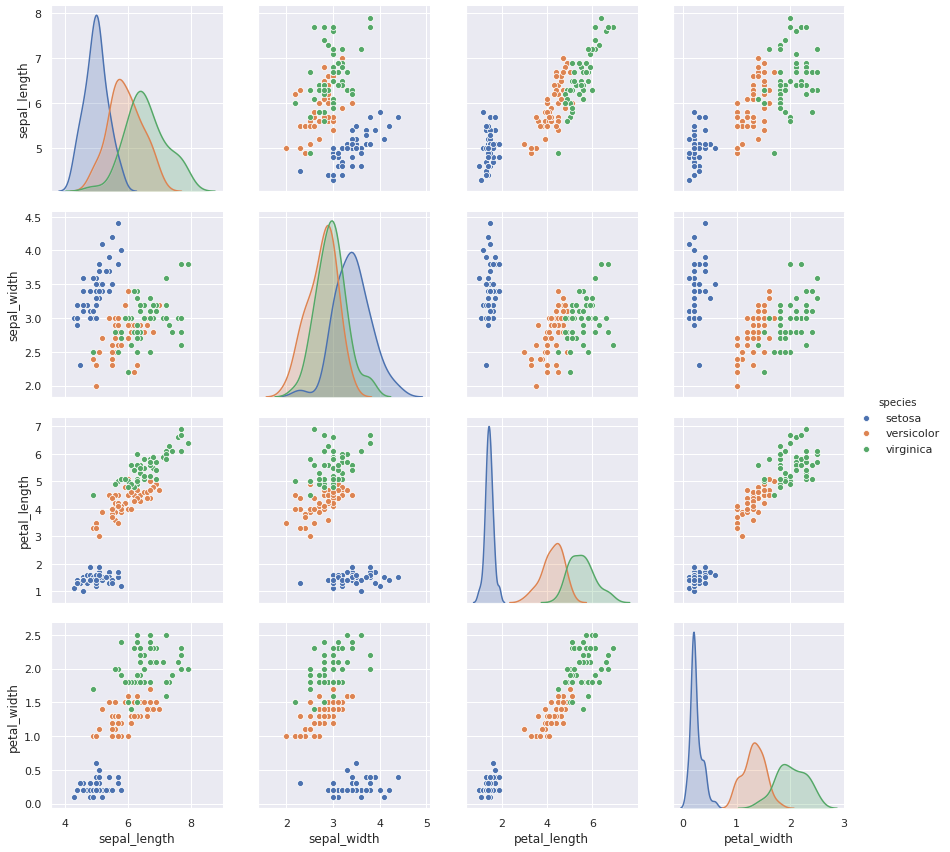

In [4]:
sns.pairplot(iris, hue='species', height=3)
plt.show()

In [5]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
X_iris = iris.drop('species', axis=1) # remember we're not dropping inplace by default
print("X_iris.shape: {}".format(X_iris.shape))
X_iris.head()

In [ ]:
y_iris = iris['species']
print(y_iris.shape)
y_iris.head()

In [ ]:
print(type(y_iris))

## scikit-learn API

Every algorithm in scikit-learn is exposed via an *Estimator* interface.

From a high level perspective, the steps in using the API are as follows:
1. Pick a model by importing it from the library
2. Choose model hyperparameters by instantiating the class with desired values
3. Arrange the data into a feature matrix and target vector
4. Fit the model to your data by calling `fit()` method on your model instance
5. Use the model to predict on new data

For supervised learning, we predict the labels on new data using the `predict()` method.

For unsupervised learning, we transform or infer properties of the data using the `transform()` or `predict()` method.

**Note**: don't try to memorize arguments, use help:
* Shift + TAB in Jupyter Notebook
* help(method)
* method?

# Linear Regression

Linear Regression models are a good starting point for regression tasks.
They are popular because they can be fit very quickly and are easy to debug.
The most simplest form of a linear regression model is fitting a straight line to data, but there are more complicated models which can work with more complex data.

## Simple Linear Regression

A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Let's start our journey with the following data which is scattered around a line of slope 3 and an intercept of -2

In [ ]:
from sklearn.linear_model import LinearRegression
rng = np.random.RandomState(5)

# the function we want to model
slope = 3
intercept = -2

def f(x):
    return slope * x + intercept;

dataset_size = 30
# noise params
noise_stddev = 1
noise_mean = 0

x_true = np.linspace(0, 10, 50)
y_true = f(x_true)

x = 10 * rng.rand(dataset_size) # x will be in [0, 10)
y = f(x) + (noise_stddev * rng.randn(dataset_size) + noise_mean) # y = f(x) = 2 * x - 5 + noise [0, 1)

y_no_noise = f(x)

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x, y, c='r', label='$f(x)$ dataset');
ax.plot(x_true, y_true, '--', label='$f(x)$ true')

model = LinearRegression(fit_intercept=True)

# (30, ) -> (30, 1)
X_train = x.reshape(x.shape[0], 1) #[:, np.newaxis]
y_train = y

model.fit(X_train, y_train)

X_pred = np.linspace(0, 10, 50)
# before: (50, )
print("X_pred shape before reshape: ", X_pred.shape)
X_pred = X_pred.reshape((X_pred.shape[0], 1))
# after: (50, 1)
print("X_pred shape after reshape: ", X_pred.shape)
y_pred = model.predict(X_pred)

ax.plot(X_pred.reshape(X_pred.size), y_pred, 'black', label='LR model of $f(x)$')

# matplotlib fun
ax.autoscale(enable=True, axis='x')
ax.legend(loc=2)
y_concat = np.concatenate((y, y_true))
min_y = np.min(y_concat)
max_y = np.max(y_concat)
ax.set_yticks(np.arange(min_y, max_y + 1, 1))

plt.show()

In [ ]:
print("Model coef: {}".format(model.coef_)) # compare this with slope
print("Model intercept: {}".format(model.intercept_)) # compare this with intercept

slope_dt = model.coef_[0] - slope
intercept_dt = model.intercept_ - intercept

# should be pretty close
print("slope_dt: {}".format(slope_dt))
print("intercept_dt: {}".format(intercept_dt))

### How does it work?

Linear Regression works by minimizing the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

Mathematically speaking, the algorithm will minimize a *Cost function* (i.e. optimize an *Objective function*).

The *Cost function* minimized by Linear Regression:
$$ \sum_{i=1}^n(y_i-\hat{y}_i)^2 $$

### *Loss function*, *Cost function*, *Objective function*

A *Loss function* is a function for penalizing the errors in prediction.
It is defined on a data point, prediction and label.
In this case:
$$ l(f(x_i), y_i) = (y_i - f(x_i))^2 $$

The *Cost function* is more general, and it might be a sum of loss functions over the entire training set plus some model complexity penalty (regularization).

$$ J = \sum_{i=1}^nl(f(x_i), y_i) = \sum_{i=1}^n(y_i-\hat{y}_i)^2 $$
where
$$ f(x_i) = \hat{y}_i $$

Optimization of *Cost function* usually involves taking the partial derivative of the *Loss function* (called gradients), and adjusting the parameters iteratively with a *learning rate*.

Common optimization aglorithms:
* Gradient Descent (GD) (extreme)
* Stocasthic Gradient Descent (SGD) (extreme)
* Minibatch Stochastic Gradient Descent (used in practice)

![](figures/1d-gradient-descent.png)

![](figures/2d-gradient-descent.png)

Take away idea: all Machine Learning algorithms try to minimize a *Cost function*, maximize an *Objective function*.

Take a look at the following figure.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x, y, c='r', label='$f(x)$ dataset');
ax.plot(x_true, y_true, '--', label='$f(x)$ true')

for i in range(0, x.size):
    ax.plot([x[i], x[i]], [y[i], f(x[i])], 'r')

# enable to see the how much it was minimized
if False:
    y_pred = model.predict(x.reshape(x.size, 1))
    ax.scatter(x, y_pred, c='black', label='$f(x)$ predicted');

    for i in range(0, x.size):    
        ax.plot([x[i], x[i]], [y[i], y_pred[i]], 'black')

    
# matplotlib fun
ax.autoscale(enable=True, axis='x')
ax.legend(loc=2)
y_concat = np.concatenate((y, y_true))
min_y = np.min(y_concat)
max_y = np.max(y_concat)
ax.set_yticks(np.arange(min_y, max_y + 1, 1))

plt.show()

## Model Evaluation

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1m}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [2]:
X = np.linspace(0, 10, 10)

X_pred = X.reshape(X.size, 1)
y_pred = model.predict(X_pred)
y_true = f(X)

# we can see that the error is between 
sns.distplot(y_pred - y_true, bins=10)
plt.show()

NameError: name 'model' is not defined

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_true, y_pred))
print('MSE:', metrics.mean_squared_error(y_true, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

## Polynomial regression

We saw that Linear Regression works on on simple linear datasets, but what if we have non linear datasets?

Remember that our straight line fit had the following equation:
$$
y = a_0 + a_1 x
$$

We can do Polynomial regression, with an arbitrary complexity (numar of coefficients).
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

In [ ]:
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
y = np.sin(X) + 0.1 * rng.randn(50)

# n_coeff = 30
n_coeff = 20

poly_model = make_pipeline(PolynomialFeatures(n_coeff), LinearRegression())
poly_model.fit(X[:, np.newaxis], y)

xfit = np.linspace(0, 9, 200)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(X, y, c='r', label='training points')
plt.plot(xfit, yfit, label='prediction on new points');
plt.plot(xfit, np.sin(xfit), 'g', label='true function')
plt.legend()
plt.show()

# Selecting the Best Model

If our estimator is underperforming, what should we do next?
* Use a more complicated/flexible model
* Use a less complicated model
* Acquire more training samples
* Acquire more features for each sample

The answer is often counter-intuitive.
Using a more complicated model can give worse results, and adding more training samples may not help at all.

## The bias-variance trade-off

Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between bias and variance.

Consider the following figure, which presents two regression fits to the same dataset:

![aa](figures/bias-variance-highbias-highvariance.png)

It is clear that neither of these models is a particularly good fit to the data, but they fail in different ways.

The model on the left attempts to find a straight-line fit through the data.
Because the data are intrinsically more complicated than a straight line, the straight-line model will never be able to describe this dataset well.
Such a model is said to *underfit* the data: that is, it does not have enough model flexibility to suitably account for all the features in the data; another way of saying this is that the model has high *bias*.

The model on the right attempts to fit a high-order polynomial through the data.
Here the model fit has enough flexibility to nearly perfectly account for the fine features in the data, but even though it very accurately describes the training data, its precise form seems to be more reflective of the particular noise properties of the data rather than the intrinsic properties of whatever process generated that data.
Such a model is said to *overfit* the data: that is, it has so much model flexibility that the model ends up accounting for random errors as well as the underlying data distribution; another way of saying this is that the model has high *variance*.

To look at this in another light, consider what happens if we use these two models to predict the y-value for some new data.
In the following diagrams, the red/lighter points indicate data that is omitted from the training set:

![](figures/bias-variance-validation-curve.png)

- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

The general behavior we would expect from a learning curve is this:

- A model of a given complexity will *overfit* a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
- A model of a given complexity will *underfit* a large dataset: this means that the training score will decrease, but the validation score will increase.
- A model will never, except by chance, give a better score to the validation set than the training set: this 
means the curves should keep getting closer together but never cross.

With these features in mind, we would expect a learning curve to look qualitatively like that shown in the following figure:

#[aa](figures/validation-curve.png)

# Models Zoo

![](figures/not-generated/scikit-learn_ml_map.png)

Check https://scikit-learn.org/stable/tutorial/machine_learning_map/

# Summary

* Machine Learning pipeline review
* scikit Python Library
* Data representation
  * Feature Matrix
  * Target array
  * iris dataset example
* Estimator API
* Linear Regression
  * Simple Linear Regression
  * Model Evaluation
  * Polynomial Regression
* Selecting the Best Model
* The bias-variance trade-off

# References

* Python Data Science Handbook, https://jakevdp.github.io/PythonDataScienceHandbook/
* scikit-learn website, https://scikit-learn.org/stable/